In [1]:
import cv2
import time
import grpc
import numpy as np
from PIL import Image

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

(112, 112)


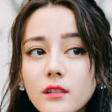

In [8]:
img = Image.open('/home/cocoza4/datasets/asr_dataset_align_retinaface/Dilraba_Dilmurat/0.jpg')
print(img.size)
img

In [12]:
img = np.array(img, dtype=np.float32)
img -= 127.5
img *= 0.0078125
inputs = np.expand_dims(img, axis=0)
inputs.shape

(1, 112, 112, 3)

In [6]:
TFS_TIMEOUT = 5.

TFS_HOST = '0.0.0.0'
TFS_PORT = 8500


In [3]:
tfs_host = '%s:%i' % (TFS_HOST, TFS_PORT)
tfs_channel = grpc.insecure_channel(tfs_host)
tfs_stub = prediction_service_pb2_grpc.PredictionServiceStub(tfs_channel)
tfs_stub

In [18]:
request = predict_pb2.PredictRequest()
request.model_spec.name = 'arcface_resnet34'
request.model_spec.signature_name = 'serving_default'
request

model_spec {
  name: "arcface_resnet34"
  signature_name: "serving_default"
}

In [19]:
request.inputs['inputs'].CopyFrom(tf.make_tensor_proto(inputs, dtype=np.float32))

In [20]:
pred = tfs_stub.Predict(request, TFS_TIMEOUT)
pred

outputs {
  key: "embeddings"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 512
      }
    }
    float_val: -0.02785886637866497
    float_val: -0.00864555686712265
    float_val: 0.06858480721712112
    float_val: -0.01921726018190384
    float_val: 0.04443126544356346
    float_val: 0.009273449890315533
    float_val: 0.044478725641965866
    float_val: -0.054476771503686905
    float_val: -0.008131701499223709
    float_val: -0.045691441744565964
    float_val: 0.014263461343944073
    float_val: -0.014747077599167824
    float_val: 0.049432072788476944
    float_val: 0.010517931543290615
    float_val: 0.0748257040977478
    float_val: 0.05915778875350952
    float_val: 0.07306979596614838
    float_val: 0.034730006009340286
    float_val: 0.02796255424618721
    float_val: 0.06978508085012436
    float_val: -0.013652345165610313
    float_val: 0.07399850338697433
    float_val: 0.0018899731803685427
    float_val: -

In [22]:
embeddings = tf.make_ndarray(pred.outputs['embeddings'])
embeddings

array([[-2.78588664e-02, -8.64555687e-03,  6.85848072e-02,
        -1.92172602e-02,  4.44312654e-02,  9.27344989e-03,
         4.44787256e-02, -5.44767715e-02, -8.13170150e-03,
        -4.56914417e-02,  1.42634613e-02, -1.47470776e-02,
         4.94320728e-02,  1.05179315e-02,  7.48257041e-02,
         5.91577888e-02,  7.30697960e-02,  3.47300060e-02,
         2.79625542e-02,  6.97850809e-02, -1.36523452e-02,
         7.39985034e-02,  1.88997318e-03, -1.54314665e-02,
        -3.06309084e-03,  8.02685916e-02, -6.70421869e-02,
         4.49731201e-02, -5.12547232e-02,  5.17144464e-02,
         7.01648928e-03, -4.49967980e-02,  1.19593097e-02,
         4.96898070e-02, -3.70235406e-02,  2.72587296e-02,
        -3.13533619e-02, -1.53809087e-02,  1.93824358e-02,
        -1.49526447e-02, -2.90010832e-02,  3.96992899e-02,
        -5.91064990e-02,  8.14803701e-04,  1.40870854e-01,
         2.30645146e-02, -2.71673724e-02, -4.48750742e-02,
        -3.53664272e-02, -4.34167534e-02,  8.22326262e-0

In [23]:
embeddings.shape

(1, 512)